In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import yaml
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit

import sys
sys.path.append("../")
from src.data_loader import load_as_sales_data
from src.data_features import build_features
from src.model import cross_validate_model
from src.evaluation import evaluate_cross_val

In [8]:
config_path = "../config.yaml"
with open(config_path) as f:
        config = yaml.safe_load(f)

#TODO: validate config

train_pl = load_as_sales_data("../"+config["dataset_path"])

X, Y = build_features(train_pl, config)
X.shape, Y.shape

((30, 12), (30, 7))

In [9]:
#Show training-validation folds for better intuition of results
ts_cv = TimeSeriesSplit(n_splits=3)

for i, (train_index, test_index) in enumerate(ts_cv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2 3 4 5 6 7 8]
  Test:  index=[ 9 10 11 12 13 14 15]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
  Test:  index=[16 17 18 19 20 21 22]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
  Test:  index=[23 24 25 26 27 28 29]


In [10]:
baseline_config = {"model_type": "baseline",
                  "model_params": {"method": "mean"}}
baseline_results = cross_validate_model(X[:,:config["time_input_length"]], Y, baseline_config)
evaluate_cross_val(baseline_results)

{'CV FOLD 0': {'RMSE': 1451.629335659627, 'MAPE': 2.410628528245275},
 'CV FOLD 1': {'RMSE': 1431.4713611909963, 'MAPE': 2.3684916780119165},
 'CV FOLD 2': {'RMSE': 1281.235190126495, 'MAPE': 2.005048695211043},
 'AVG': {'RMSE': 1392.983766559044, 'MAPE': 2.261389633822744}}

In [11]:
linear_config = {"model_type": "linear"}
linear_results = cross_validate_model(X, Y, linear_config)
evaluate_cross_val(linear_results)

{'CV FOLD 0': {'RMSE': 797.7950902669901, 'MAPE': 0.20113463278452395},
 'CV FOLD 1': {'RMSE': 466.9653270840939, 'MAPE': 0.15020881247997098},
 'CV FOLD 2': {'RMSE': 355.283357142855, 'MAPE': 0.1266859248073463},
 'AVG': {'RMSE': 596.3259211939858, 'MAPE': 0.15934312335728038}}

In [12]:
results = cross_validate_model(X, Y, config)
evaluate_cross_val(results)

{'CV FOLD 0': {'RMSE': 239.85269790770045, 'MAPE': 0.06970571922355233},
 'CV FOLD 1': {'RMSE': 234.71519223447436, 'MAPE': 0.0852725961641756},
 'CV FOLD 2': {'RMSE': 370.809475404836, 'MAPE': 0.1171588908412753},
 'AVG': {'RMSE': 296.19696108195825, 'MAPE': 0.0907124020763344}}

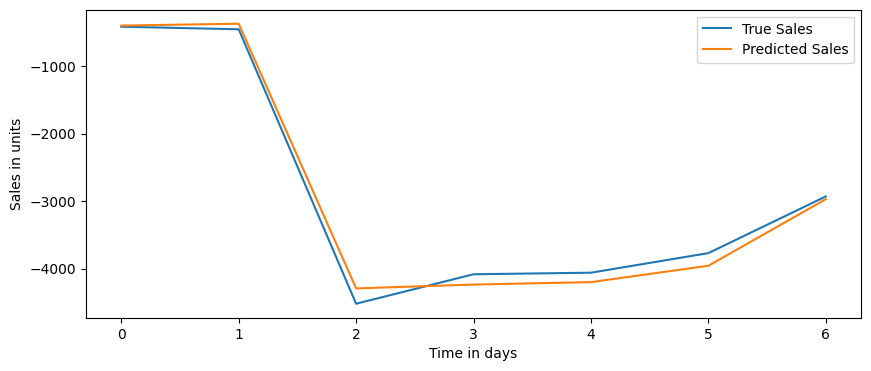

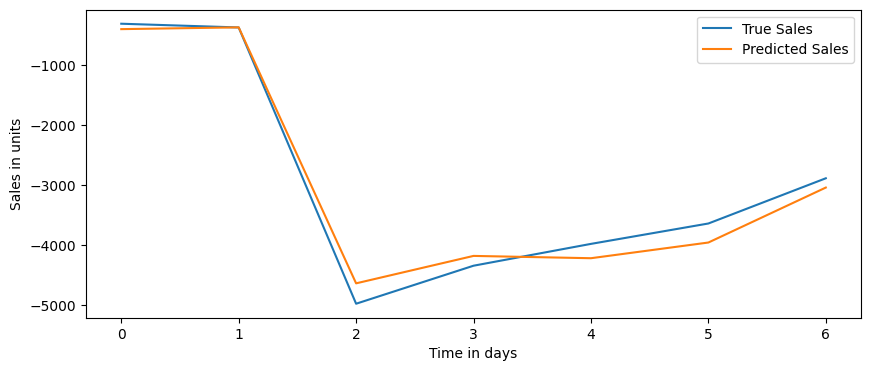

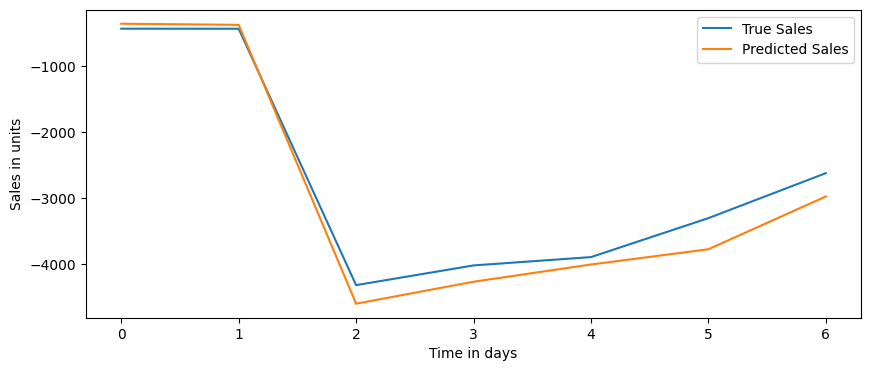

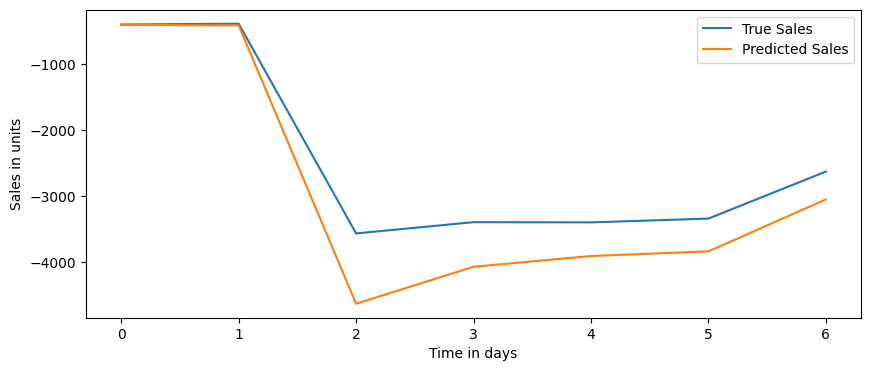

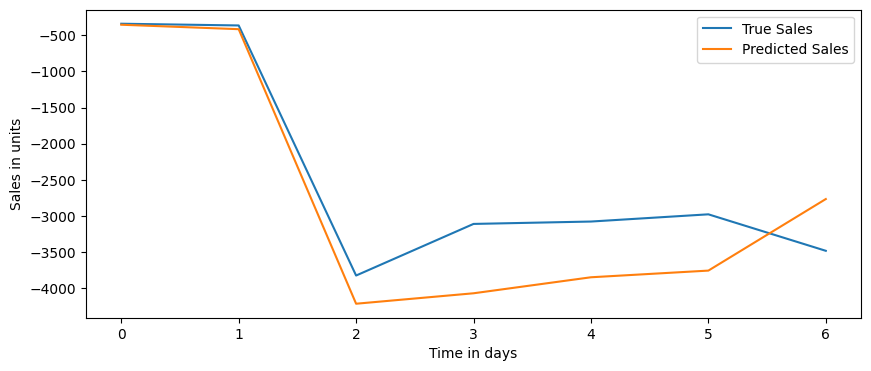

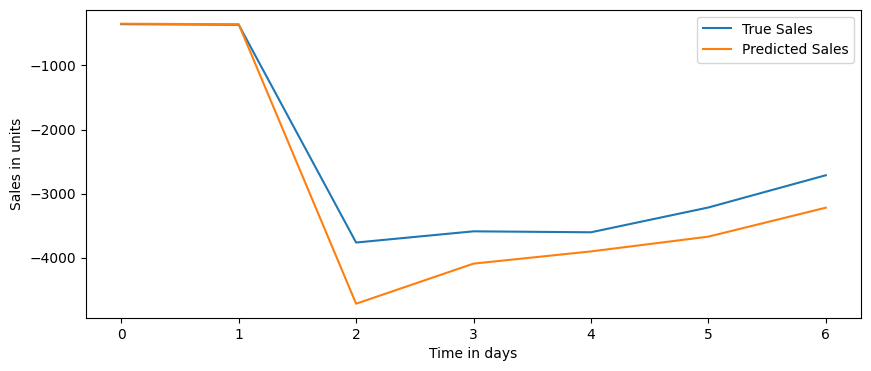

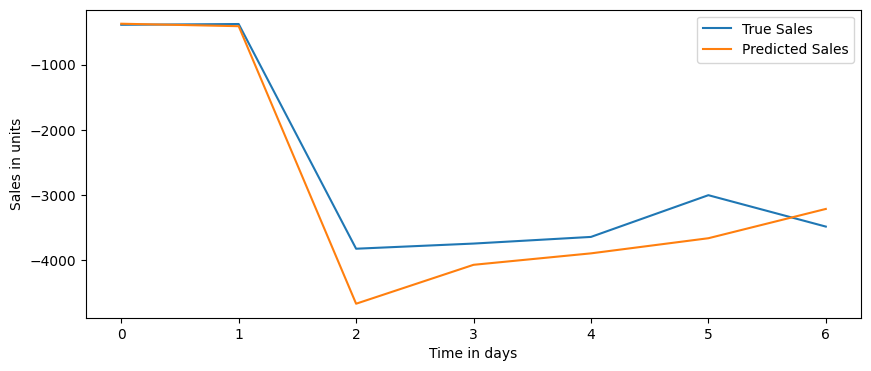

In [13]:
for i in range(7):
    plt.figure(figsize=(10,4))
    plt.plot(results[2][0][i,:], label="True Sales")
    plt.plot(results[2][1][i,:], label="Predicted Sales")
    plt.xlabel("Time in days")
    plt.ylabel("Sales in units")
    plt.legend()